In [53]:
library(tidyverse)
options(repr.plot.width = 7)
source("/nfs/research/irene/ysong/MY_BIN/ggplot_themes.r")

In [54]:
order_dist =  rev(c('expressed in over 90%','expressed in over 30%','expressed in less than 30%','expressed in single','lowly expressed'))


In [55]:
# species order according to phylogenetic tree:
# https://www.sciencedirect.com/science/article/pii/S0092867421004402#fig1

In [56]:
all_pairs_new <- data.frame(
  species_1 = c('Nvec', 'Xesp', 'Xesp', 'Hvul', 'Hvul', 'Hvul'),
  species_2 = c('Spis', 'Nvec', 'Spis','Xesp', 'Nvec', 'Spis')
)

In [57]:
data_all = data.frame()


# Iterate over rows and assign values to species_1 and species_2
for (i in 1:nrow(all_pairs_new)) {
    species_1 <- all_pairs_new[i, 'species_1']
    species_2 <- all_pairs_new[i, 'species_2']

    message(species_1)
    message(species_2)

    data_dist <- read_csv(paste0("o2o_heatmap_data_", species_1, "_", species_2, "_1e6_0.1lim_3fold_broad_type_dist.csv"))
    
    fig = data_dist %>%
pivot_longer(cols = -c(1), names_to = paste0('dist_category_',species_1), values_to = 'pct')  %>% 
    rename(spec_category_species_1 = eval(paste0('dist_category_',species_1))) %>% 
    rename(spec_category_species_2 = eval(paste0('dist_category_',species_2))) %>% 
    mutate(spec_category_species_1 = factor(spec_category_species_1, levels = order_dist)) %>% 
    mutate(spec_category_species_2 = factor(spec_category_species_2, levels = order_dist)) %>% 
    ggplot(aes(x = spec_category_species_1, 
               y = spec_category_species_2,
               fill = pct)) +
    geom_tile() + 
    geom_text(aes(label = pct, color = ifelse(pct > 70, 'black', 'white')), size = 2, show.legend = FALSE)+
    scale_fill_viridis(limits = c(0, 60), breaks = c(0, 10, 20, 30, 40, 50, 60), option = 'plasma',
                       labels = c(0, '10%', '20%', '30%', '40%', '50%', '60%'), name = 'Percent\noverlap') +
    common_45x  +
    scale_colour_manual(values=c("white"="white", "black"="black")) +
    labs(x = paste0(species_1, ' gene classes'), y = paste0(species_2, ' gene classes'))
    

    saveRDS(object = fig, file =  paste0("o2o_heatmap_figs_dist/", species_1, "_", species_2, "_one2one_heatmap_r.rds"))

    ggsave(plot = fig, filename = paste0("o2o_heatmap_figs_dist/", species_1, "_", species_2, "_one2one_heatmap_r.pdf"), height = 3, width = 4)

    data_add = data %>% pivot_longer(cols = -c(1), names_to = paste0('dist_category_',species_1), values_to = 'pct') %>% 
mutate(species_1 = species_1) %>% mutate(species_2 = species_2) 

    colnames(data_add) = c('dist_category_species_2', 'dist_category_species_1', 'pct', 'species_1', 'species_2')

    data_all = rbind(data_all, data_add)
    

    
}

Nvec

Spis

Rows: 5 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): dist_category_Spis
dbl (5): expressed in less than 30%, expressed in over 30%, expressed in ove...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“‘mode(bg)’ differs between new and previous
	 ==> NOT changing ‘bg’”
Xesp

Nvec

Rows: 5 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): dist_category_Nvec
dbl (5): expressed in less than 30%, expressed in over 30%, expressed in ove...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“‘mode(bg)’ differs between new and previous
	 ==> NOT changing ‘bg’”
Xesp

Spis

Rows: 5 Columns: 6
── Column speci

In [61]:
fig_all = data_all %>% group_by(dist_category_species_2, dist_category_species_1) %>% mutate(avg_pct_cross_species = mean(pct)) %>% 
select(dist_category_species_2, dist_category_species_1, avg_pct_cross_species) %>% unique() %>% 
    ggplot(aes(x = factor(dist_category_species_1, levels = order), y = factor(dist_category_species_2, levels = order), fill = avg_pct_cross_species)) +
    geom_tile()  + 
    geom_text(aes(label = round(avg_pct_cross_species, 2), color = ifelse(avg_pct_cross_species > 70, 'black', 'white')), size = 2, show.legend = FALSE) +
    scale_fill_viridis(limits = c(0, 60), breaks = c(0, 10, 20, 30, 40, 50, 60), option = 'plasma',
                       labels = c(0, '10%', '20%', '30%', '40%', '50%', '60%'), name = 'Percent\noverlap') +
    common_45x  +
    scale_colour_manual(values=c("white"="white", "black"="black")) +
labs(x = 'Species A gene class', y = 'Species B gene class') 

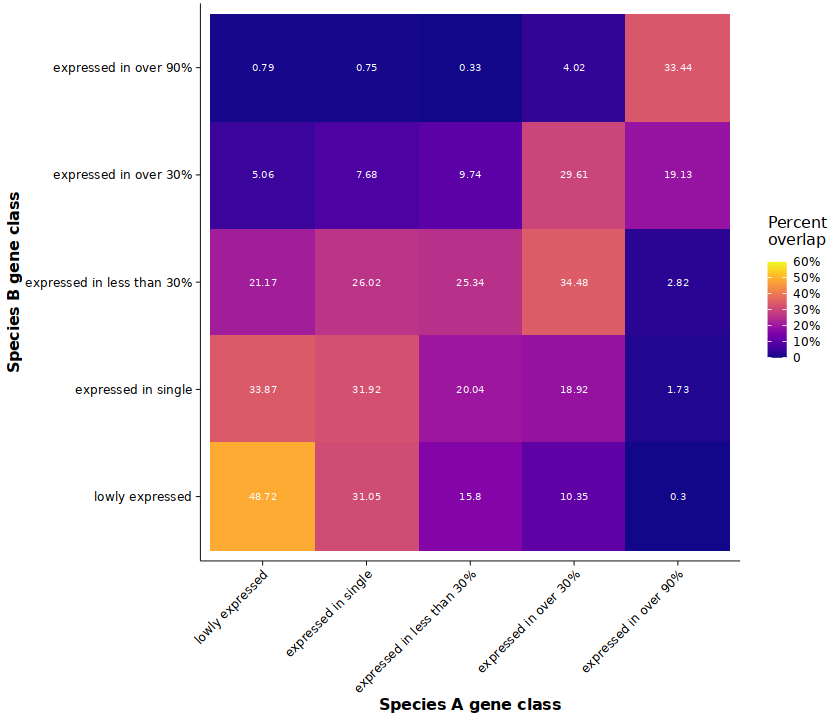

In [62]:
fig_all

In [63]:
saveRDS(object = fig_all, file =  paste0("o2o_heatmap_figs_dist/", "avg_species_a_b_one2one_heatmap_r.rds"))

ggsave(plot = fig_all, filename = paste0("o2o_heatmap_figs_dist/", "avg_species_a_b_one2one_heatmap_r.pdf"), height = 3, width = 4)


Warning message:
“‘mode(bg)’ differs between new and previous
	 ==> NOT changing ‘bg’”
